<a href="https://colab.research.google.com/github/Shanutyagi-developer/Machine-learning-Project-/blob/main/Gold_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and processing

In [ ]:
# loading the csv daat to a pandas data frame
gold_data = pd.read_csv("/content/gld_price_data.csv")
print(gold_data)

           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


head() -> help us to show the first five rows and columns  from datafile



In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# Print last five rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number odf rows and columns
gold_data.shape

(2290, 6)

In [ ]:
# Getting some basics info about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
# getting the statistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation :

1.Positive Correlation

2.negative correlation

In [ ]:
correlation = gold_data.drop(['Date'], axis=1).corr()

<Axes: >

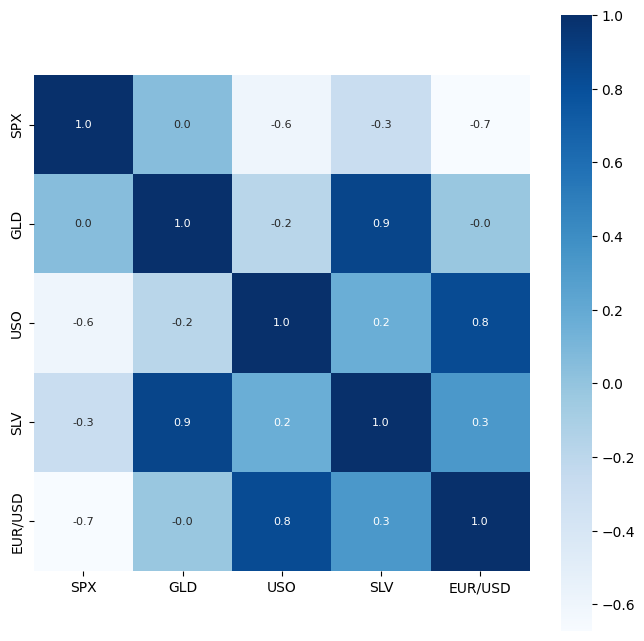

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True,square = True,fmt='.1f',annot = True,annot_kws={'size':8},cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-3017478376.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

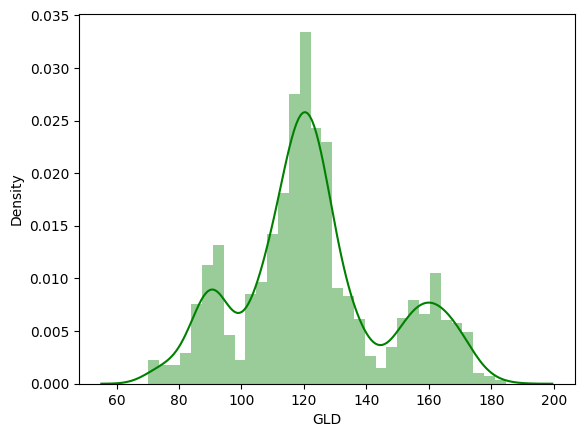

In [ ]:
# checking the distribution of the gold price
sns.distplot(gold_data['GLD'],color='green')

Splittiing the features and the target

In [ ]:
x = gold_data.drop(['GLD','Date'],axis=1)
y = gold_data['GLD']

In [ ]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training and test data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

Model Training Random Forest Regressor

In [ ]:
regressor =  RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model evaluation

In [ ]:
# prediction on Test data
test_data_prediction = regressor.predict(x_test)

In [ ]:
print(test_data_prediction)

[168.66869881  82.08469966 116.22670009 127.52170064 120.85170119
 154.59659777 150.24989832 126.06860026 117.52549864 125.92560075
 116.67680115 171.34540068 141.21579933 168.23949861 115.15289999
 117.70990053 139.01090301 170.22940115 159.17030359 159.60569938
 155.14770011 125.41289993 176.74049953 157.10900361 125.11080049
  94.0194997   78.25109986 120.53979999 119.04989926 167.54320061
  88.02330079 125.29479999  91.32220051 117.69940007 121.12959927
 136.44190102 115.59810092 115.08560075 146.86539914 107.22380111
 104.58640245  87.30689808 126.58240052 117.97500029 151.411899
 119.58210014 108.34420003 107.9817982   92.96440024 126.94629818
  74.92120063 113.64849925 121.31440022 111.20959899 118.89739923
 120.82589931 159.13740011 168.29660032 147.19879666  85.65549838
  94.25350019  86.83169876  90.54769968 118.9389006  126.4169003
 127.49279989 169.49099969 122.29949952 117.37649912  98.30210032
 167.86670108 142.74829843 131.81810241 121.22360213 121.02279927
 119.81300069

In [ ]:
# r squared error
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R Squared error:",error_score)

R Squared error: 0.9885040446925126


Compare the actual and Predictied values ina plot


In [ ]:
y_test = list(y_test)

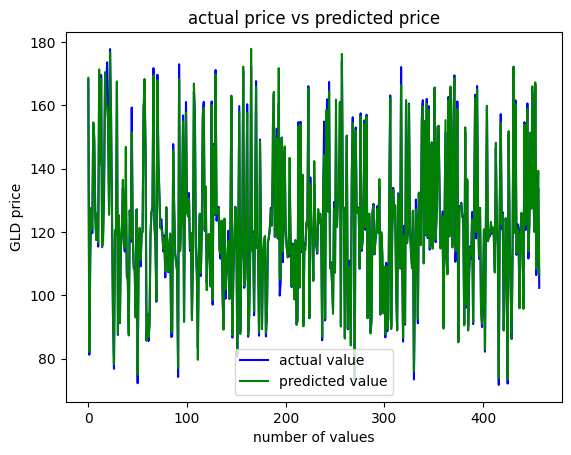

In [ ]:
plt.plot(y_test,color='blue', label ='actual value')
plt.plot(test_data_prediction, color='green', label='predicted value')
plt.title('actual price vs predicted price')
plt.xlabel('number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()
